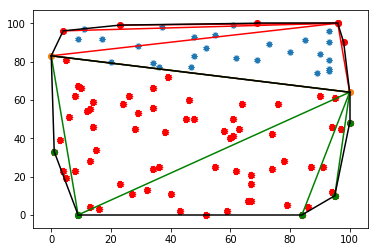

In [26]:
import random
import matplotlib.pyplot as plt
import time
def ret_x(seq):
    return seq[0]
def ret_y(seq):
    return seq[1]
def tri_area(q1,q2,q3):
    #print("area"+str((q1[0]*q2[1]+q3[0]*q1[1]+q2[0]*q3[1]-q3[0]*q2[1]-q2[0]*q1[1]-q1[0]*q3[1])))
    return (q1[0]*q2[1]+q3[0]*q1[1]+q2[0]*q3[1]-q3[0]*q2[1]-q2[0]*q1[1]-q1[0]*q3[1])#已知三点求面积
def find_max_point(s,p1,p3):#找到点集s中使得s，p1，p2面积最大的点
    max=[0,0,0]
    for i in s:
        area=(tri_area(p1,p3,i))
        if abs(area)>abs(max[2]):
            max[2]=(area)
            max[1]=i[1]
            max[0]=i[0]
    if max[2]>0:
        plt.scatter(max[0],max[1],color='r')
    if max[2]<0:
        plt.scatter(max[0],max[1],color='g')
    return max
def div_s_l(s,p1,p2,p3):#将p1->p3z左侧的点集一分为2
    s1=[]
    s2=[]
    for i in s:
        if tri_area(p1,p2,i)>0:
            s1.append(i)
        if tri_area(p2,p3,i)>0:
            s2.append(i)
    #time.sleep(1)
    return s1,s2
def div_s_r(s,p1,p2,p3):#将p2—>p3右侧的点集一分为2
    s1=[]
    s2=[]
    for i in s:
        if tri_area(p1,p2,i)<0:
            s1.append(i)
        if tri_area(p2,p3,i)<0:
            s2.append(i)
    #time.sleep(1)
    return s1,s2
def find_max_l(s1,p1,p3):#分治p1->p3左侧的点
    if len(s1)==0:
        plt.plot([p1[0],p3[0]],[p1[1],p3[1]],color='k')
    if len(s1)>0:
        plt.plot([p1[0],p3[0]],[p1[1],p3[1]],color='r')
        p2_l=find_max_point(s1,p1,p3)
        s1_1,s1_2=div_s_l(s1,p1,p2_l,p3)
        find_max_l(s1_1,p1,p2_l)
        find_max_l(s1_2,p2_l,p3)
def find_max_r(s2,p1,p3):#分治p2->p3右侧点
    if len(s2)==0:
        plt.plot([p1[0],p3[0]],[p1[1],p3[1]],color='k')
    if len(s2)>0:
        plt.plot([p1[0],p3[0]],[p1[1],p3[1]],color='g')
        p2_r=find_max_point(s2,p1,p3)
        s2_1,s2_2=div_s_r(s2,p1,p2_r,p3)
        find_max_r(s2_1,p1,p2_r)
        find_max_r(s2_2,p2_r,p3)
def find_max(s1,s2,p1,p3):
    if len(s1)>0:
        p2_l=find_max_point(s1,p1,p3)
        find_max_l(s1,p1,p3)
    if len(s2)>0:
        s2_x=[]
        s2_y=[]
        for i in s2:
            s2_x.append(i[0])
            s2_y.append(i[1])
        plt.scatter(s2_x,s2_y,color='r',marker=(9, 2, 30))
        p2_r=find_max_point(s2,p1,p3)
        find_max_r(s2,p1,p3)

point=[]
point_x=[]
point_y=[]
for i in range(100):
    point.append([random.randint(0,100),random.randint(0,100)])
    point_x.append(point[len(point)-1][0])
    point_y.append(point[len(point)-1][1])
plt.scatter(point_x,point_y,marker=(9, 1, 30))
point=sorted(point,key=ret_x)
leng=len(point)
plt.scatter([point[0][0],point[leng-1][0]],[point[0][1],point[leng-1][1]])
p1=[point[0][0],point[0][1]]
p2=[point[leng-1][0],point[leng-1][1]]
s1=[]
s1_x=[]
s1_y=[]
s2=[]
s2_x=[]
s2_y=[]
for i in point:
    if tri_area(p1,p2,i)>0:
        s1.append(i)
        s1_x.append(i[0])
        s1_y.append(i[1])
    elif tri_area(p1,p2,i)<0:
        s2.append(i)
        s2_x.append(i[0])
        s2_y.append(i[1])
#print(s1_x)
#print(s2_x)
#plt.scatter(s1_x,s1_y,color='g',marker=(9, 2, 30))
#plt.scatter(s2_x,s2_y,color='r',marker=(9, 2, 30))
find_max(s1,s2,p1,p2)
plt.plot([p1[0],p2[0]],[p1[1],p2[1]],color='k')
#print(point)

[1, 23, 3]
[]
